# Business Understanding
Microsoft wants to start creating video content. They want to know which films are doing best at the box office. Analysis of these datasets should provide insights into the next course of action


In [100]:
#import libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [9]:
#import IMDB dataset
conn = sqlite3.connect('im.db')
cur = conn.cursor()
cur.execute('''
SELECT name
  FROM sqlite_master
WHERE type = 'table'
''')
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [10]:
%%script sqlite3 data.sqlite --out tables
.tables
.quit

In [21]:
print(tables)

In [25]:
#viewing movie ratings table
movie_ratings_df = pd.read_sql('''
SELECT* 
 FROM movie_ratings ''', conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# Movie_ratings Data Understanding

In [34]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movie_id       73856 non-null  object
 1   averagerating  73856 non-null  object
 2   numvotes       73856 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [35]:
movie_ratings_df.shape

(73856, 3)

In [36]:
movie_ratings_df.describe()

,numvotes
count,7.385600e+04
mean,3.523662e+03
std,3.029402e+04
min,5.000000e+00
25%,1.400000e+01
50%,4.900000e+01
75%,2.820000e+02
max,1.841066e+06


In [37]:
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

# Movie_ratings Data cleaning

In [64]:
movie_ratings_df = movie_ratings_df.rename(columns={"averagerating": "average_rating", "numvotes": "num_votes"})
movie_ratings_df



,movie_id,average_rating,num_votes
0,tt10356526,average_rating,31
1,tt10384606,average_rating,559
2,tt1042974,average_rating,20
3,tt1043726,average_rating,50352
4,tt1060240,average_rating,21
...,...,...,...
73851,tt9805820,average_rating,25
73852,tt9844256,average_rating,24
73853,tt9851050,average_rating,14
73854,tt9886934,average_rating,5


# Movie Basics Data Understanding

In [74]:
movie_basics_df = pd.read_sql('''
SELECT* 
 FROM movie_basics ''', conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [75]:
movie_basics_df.shape

(146144, 6)

In [76]:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [77]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [78]:
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [79]:
movie_basics_df.nunique()

movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

# Cleaning movie_basics

In [96]:
movie_basics_df.reset_index(drop=True)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


# Merging movie_basics and Movie_rating and Understanding the resulting data

In [82]:
best_rated_df = pd.read_sql( '''
SELECT genres, averagerating, start_year 
  FROM movie_basics
  JOIN movie_ratings
  USING(movie_id)''', conn)
best_rated_df


,genres,averagerating,start_year
0,"Action,Crime,Drama",7.0,2013
1,"Biography,Drama",7.2,2019
2,Drama,6.9,2018
3,"Comedy,Drama",6.1,2018
4,"Comedy,Drama,Fantasy",6.5,2017
...,...,...,...
73851,Documentary,6.2,2019
73852,"Drama,Family",8.7,2019
73853,Documentary,8.5,2017
73854,None,6.6,2019


In [83]:
best_rated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         73052 non-null  object 
 1   averagerating  73856 non-null  float64
 2   start_year     73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [84]:
best_rated_df.describe()

,averagerating,start_year
count,73856.000000,73856.000000
mean,6.332729,2014.276132
std,1.474978,2.614807
min,1.000000,2010.000000
25%,5.500000,2012.000000
50%,6.500000,2014.000000
75%,7.400000,2016.000000
max,10.000000,2019.000000


In [88]:
best_rated_df.isnull().sum()

genres           804
averagerating      0
start_year         0
dtype: int64

In [86]:

best_rated_df.shape

(73856, 3)

In [89]:
best_rated_df.nunique()

genres           923
averagerating     91
start_year        10
dtype: int64

# Data Cleaning best-rated-df

In [154]:
best_rated_df.dropna(subset=['genres'], axis=0, inplace=True)
best_rated_df


,genres,averagerating,start_year
0,"Action,Crime,Drama",7.0,2013
1,"Biography,Drama",7.2,2019
2,Drama,6.9,2018
3,"Comedy,Drama",6.1,2018
4,"Comedy,Drama,Fantasy",6.5,2017
...,...,...,...
73850,Documentary,6.2,2019
73851,Documentary,6.2,2019
73852,"Drama,Family",8.7,2019
73853,Documentary,8.5,2017


In [160]:
x = best_rated_df['genres'].value_counts().sort_values(ascending=False).head()
x



Drama           11612
Documentary     10313
Comedy           5613
Horror           2692
Comedy,Drama     2617
Name: genres, dtype: int64

In [150]:
x(reverse) = True

SyntaxError: cannot assign to function call (<ipython-input-150-9b3bbee85fb9>, line 1)

In [159]:
#top = {i: j for i, j in x.item()
      if j >= x}
#top

IndentationError: unexpected indent (<ipython-input-159-c0c0377696b1>, line 2)

# Visualizing the relationship between genres and average_rating 

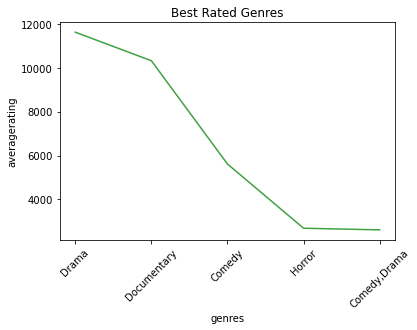

In [168]:
fig,ax = plt.subplots()
genres = x
ax.plot(genres, color='g', alpha=0.75)
ax.set_xlabel('genres')
ax.set_ylabel('averagerating')
ax.set_title('Best Rated Genres')

plt.xticks(rotation='45')
plt.show()
#plt.axvline( color='k', linewidth=1)

# Understanding movie_earnings_df data

In [170]:
#import movie.gross dataset
movie_earnings_df = pd.read_csv('bom.movie_gross.csv.gz') 
movie_earnings_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
movie_earnings_df.shape

(3387, 5)

In [174]:
movie_earnings_df.describe(include = 'all')

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [172]:
movie_earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [173]:
movie_earnings_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Data understanding for the movie_basics 


In [4]:
movie_information_df = pd.read_csv('rt.movie_info.tsv.gz', sep='\t', encoding='latin1')
movie_information_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


The code below isto help us understand movie_info df


In [5]:
movie_information_df.shape

(1560, 12)

In [6]:
movie_information_df.nunique()

id              1560
synopsis        1497
rating             6
genre            299
director        1125
writer          1069
theater_date    1025
dvd_date         717
currency           1
box_office       336
runtime          142
studio           200
dtype: int64

In [176]:
movie_information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [175]:
movie_information_df.describe(include ='all')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1560.000000,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,NaN,1497,6,299,1125,1069,1025,717,1,336,142,200
top,NaN,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"20,900,803",90 minutes,Universal Pictures
freq,NaN,2,521,151,10,4,8,11,340,2,72,35
mean,1007.303846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,579.164527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,504.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1007.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1503.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#average movie runtime
#movie_information_df.runtime.astype('object')
#movie_information_df['runtime'].mean()

In [38]:
movie_information_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1555    False
1556    False
1557    False
1558    False
1559    False
Length: 1560, dtype: bool

In [7]:
movie_information_df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [40]:
#drop empty row in ratings and reviews column
movie_information_df.dropna(subset=['studio', 'genre'], axis=0, how='any', inplace=True)
movie_information_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,NaN,Robert Zullo,NaN,NaN,NaN,NaN,NaN,Showtime Documentary Films
...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage


In [41]:
movie_information_df.drop_duplicates(subset=['studio', 'genre'], inplace=True)
movie_information_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,NaN,Robert Zullo,NaN,NaN,NaN,NaN,NaN,Showtime Documentary Films
...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage


In [54]:
movie_information_df.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,NaN,Robert Zullo,NaN,NaN,NaN,NaN,NaN,Showtime Documentary Films
12,19,While Microsoft may be the biggest software co...,NR,Documentary|Special Interest,NaN,NaN,"Aug 23, 2002","Sep 30, 2003",NaN,NaN,90 minutes,Seventh Art Releasing
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
19,26,A comic series of short vignettes build on one...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,"1,971,135",96 minutes,MGM


# Visualization of movie_information_df


In [7]:
#what genres are studios producing
#movie_information_df.plot(kind ='hist', color='red', bins=20);


In [178]:
reviews_df= pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='latin1')
reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [ ]:
reviews_df.shape

In [ ]:
reviews_df.nunique()

In [ ]:
reviews_df.info()

In [26]:
movies_xstics_df = pd.read_csv('tmdb.movies.csv.gz')
movies_xstics_df


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [25]:
movies_xstics_df.shape

NameError: name 'movies_xstics_df' is not defined

In [ ]:
movies_xstics_df.describe()

In [ ]:
movies_xstics_df.info()

In [16]:
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
movie_budgets_df.shape

In [17]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [179]:
pd.concat([movie_information_df, reviews_df], join="inner")

,id,rating
0,1,R
1,3,R
2,5,R
3,6,R
4,7,NR
...,...,...
54427,2000,NaN
54428,2000,1/5
54429,2000,2/5
54430,2000,2.5/5


In [181]:
x = movie_information_df.merge(reviews_df, left_on='rating', right_on='rating', suffixes=('_left', '_right'))

,id_left,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id_right,review,fresh,critic,top_critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,251,What Carol captures more specifically than the...,fresh,Ian Barr,0,NaN,"March 2, 2016"
1,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,322,"With a reasonable smattering of gore, and some...",fresh,Felix Hubble,0,NaN,"March 3, 2016"
2,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,667,The humour thrives primarily off of the kookin...,fresh,Isobel Yeap,0,NaN,"May 13, 2016"
3,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,760,The times they are a-changin': a frat comedy w...,fresh,Jaymes Durante,0,NaN,"May 18, 2016"
4,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1483,Often evoking the dark humour of a Beckett pla...,fresh,Isobel Yeap,0,NaN,"May 15, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43151,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,"A lightweight, uneven action comedy that freel...",rotten,Daniel Eagan,0,Film Journal International,"October 5, 2002"
43152,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,"The funny thing is, I didn't mind all this con...",fresh,Andrew Sarris,1,Observer,"October 2, 2002"
43153,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,Despite Besson's high-profile name being Wasab...,fresh,Andy Klein,0,New Times,"September 26, 2002"
43154,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,The film lapses too often into sugary sentimen...,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"


In [184]:
x.isna().sum()

0

In [188]:
x.shape

(5,)

In [189]:
x.describe()

count        5.000000
mean      6569.400000
std       4213.453251
min       2617.000000
25%       2692.000000
50%       5613.000000
75%      10313.000000
max      11612.000000
Name: genres, dtype: float64

In [191]:
x.info()

AttributeError: 'Series' object has no attribute 'info'

In [206]:
income_df = movie_budgets_df.join(movie_earnings_df, lsuffix='domestic_gross', rsuffix='domestic_gross')
income_df

,id,release_date,movie,production_budget,domestic_grossdomestic_gross,worldwide_gross,title,studio,domestic_grossdomestic_gross,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Toy Story 3,BV,415000000.0,652000000,2010.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Inception,WB,292600000.0,535700000,2010.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Shrek Forever After,P/DW,238700000.0,513900000,2010.0
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,NaN,NaN,NaN,NaN,NaN
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,NaN,NaN,NaN,NaN,NaN


In [203]:
income_df.describe()

,id,domestic_grossdomestic_gross,year
count,5782.000000,3.359000e+03,3387.000000
mean,50.372363,2.874585e+07,2013.958075
std,28.821076,6.698250e+07,2.478141
min,1.000000,1.000000e+02,2010.000000
25%,25.000000,1.200000e+05,2012.000000
50%,50.000000,1.400000e+06,2014.000000
75%,75.000000,2.790000e+07,2016.000000
max,100.000000,9.367000e+08,2018.000000


In [205]:
income_df.isna().sum()

id                                 0
release_date                       0
movie                              0
production_budget                  0
domestic_grossdomestic_gross       0
worldwide_gross                    0
title                           2395
studio                          2400
domestic_grossdomestic_gross    2423
foreign_gross                   3745
year                            2395
dtype: int64

In [211]:
income_df.nunique()


id                               100
release_date                    2418
movie                           5698
production_budget                509
domestic_grossdomestic_gross    5164
worldwide_gross                 5356
title                           3386
studio                           257
domestic_grossdomestic_gross    1797
foreign_gross                   1204
year                               9
dtype: int64

In [215]:
income_df['studio'].value_counts()

IFC       166
Uni.      147
WB        140
Magn.     136
Fox       136
         ... 
Rog.        1
Rocket      1
AM          1
AaF         1
KS          1
Name: studio, Length: 257, dtype: int64